
In this Task we have to implement a Perceptron Classifier

In [44]:
%pylab inline
import numpy as np
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [43]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
import dmStyle
dmStyle.customize_mpl()


Setting custom matplotlib visual style


In [23]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

###Perceptron
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{-1, +1\})$.
Your goal in this assignment is to implement perceptron classifier. Recall that a perceptron uses the hypothesis $\begin{equation} h_\theta(x) = x^T\theta. \end{equation}$ with the classification rule $sign(h_\theta(x))$. 

In perceptron we try to optimize (minimize) following cost function (without regularization):

 $$\begin{equation} J_\theta = \frac{1}{2m}\sum_{i=1}^m  max(0,-y^{(i)} x^{(i) T}\theta)\end{equation}$$
 
 
Here $m$ is the number of training exmaples.


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 
Recall the partial derivative of the cost function wrt $\theta_j$ for a single example =

$$
\frac{\partial J}{\partial \theta_j}=\begin{cases}-y\cdot x_j & \text{if $y\cdot x^T \theta <0$}, \\ 0 &
\text{otherwise}.\end{cases}
$$





In [24]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxiter, alpha, plotcf):
    
    # Remember you must plot the cost function after set of iterations to
    # check whether your gradient descent code is working fine or not...
    eps=0.00001
    #print X.shape
    nexamples=float(X.shape[0])
    #thetas=rand(X.shape[1],1)
    thetas=np.random.rand(X.shape[1],1)#np.ones((X.shape[1],1))*0.001
    # your code here ...
    converged = False
    numiter =0
    CF = cost_function(X,Y,thetas)
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad =derivative_cost_function(X,Y,thetas)

        for k in range(len(thetas)):
            thetas[k]=thetas[k] - alpha * grad[k]

        # mean squared error
        e = cost_function(X,Y,thetas) 
        
        if abs(CF-e) <= eps:
            print 'Converged, iterations: ', numiter, '!!!'
            converged = True
        
        CF = e   # update error 
        numiter += 1  # update iter
    
        if numiter == maxiter:
            print 'Max interactions exceeded!'
            converged = True
    print 'Value of Cost Function (obtained in {} iterations) at Minimum Points {}, is {}'.format(numiter,thetas,CF)
    return thetas

In [25]:
class Perceptron:
    ''' Implements the Perceptron For Classification... '''
    def __init__(self, scalefeatures=False):        
        self.theta=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        
        pass
    
    def hypothesis(self, X,theta):
        h=np.dot(X.T,theta)
        return h
    def cost_function(self, X,Y, theta):

        m=X.shape[0]
        cost =  (1.0/m) * sum(max(0,([-1*Y[i]*self.hypothesis(X[i,:],theta) for i in range(m)])))
        return cost
    
    def derivative_cost_function(self,X,Y,theta):

        m=X.shape[0]
        partialDerivatives=[]
        for j in range(len(theta)):
            derivative=(1.0/m) * sum([ 0 if(Y[i]*self.hypothesis(X[i,:],theta)> 0) else (-Y[i]*X[i][j]) for i in range(m)])
            partialDerivatives.append(derivative)
        return np.asarray(partialDerivatives)

    def train(self, X, Y):
        
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        maxiter=20000
        alpha=0.01
        self.theta=GradientDescent(X,Y,self.cost_function,self.derivative_cost_function,maxiter,alpha,True)
        
    
    def predict(self, X):

        num_test = X.shape[0]
        pclasses=[]
        h=[]
        for i in range(num_test):
            h.append(percep.hypothesis(X[i,:],percep.theta))
        for j in range(len(h)):
            if (h[j]>0):
                pclasses.append(1)
            else:
                pclasses.append(-1)
        return pclasses
    
    
    def scale_features(self,X):

        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)*6-3


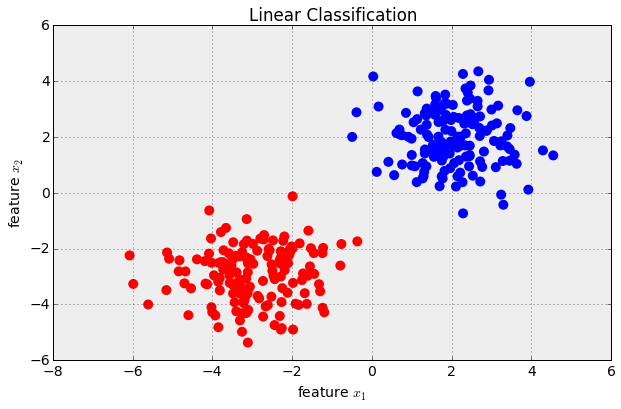

In [26]:
# Create some dummy data for testing
np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=300
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),-1*np.ones((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-temp.svg',format='svg')

In [27]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [28]:
print X.shape,Y.shape

(300L, 3L) (300L, 1L)


In [29]:
def test_derivative(X,Y,cost_function,derivative_cost_function):
   
    thetas=np.random.rand(X.shape[1],1)
    ad=derivative_cost_function(X,Y,thetas)
    print thetas, ad
    eps= 0.00001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =',ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

## Test derivatives and train the classifier

In [30]:
#%pdb
percep=Perceptron()

In [31]:
test_derivative(X,Y,percep.cost_function,percep.derivative_cost_function)

[[ 0.62723103]
 [ 0.65201434]
 [ 0.90706938]] [ 2.51621952  2.45150451  0.        ]
diff in direction [[  2.00000000e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  2.00000000e-05]
 [  0.00000000e+00]]
diff in direction [[  0.00000000e+00]
 [  0.00000000e+00]
 [  2.00000000e-05]]
Computational derivatvie = [2.5162195209205152, 2.4515045087492027, 2.2204460492503128e-11]
Analytical derivative = (3L,) [ 2.51621952  2.45150451  0.        ]
Their difference= [ -2.15911733e-11  -3.73674425e-11   2.22044605e-11]


In [32]:
percep.train(X,Y) # your cost function at the minimum must be zero...

Converged, iterations:  2203 !!!
Value of Cost Function (obtained in 2204 iterations) at Minimum Points [[-0.22889301]
 [-0.28510816]
 [ 0.24174803]], is -1.27488900173


[ 5.72867775] [-2.80396999]


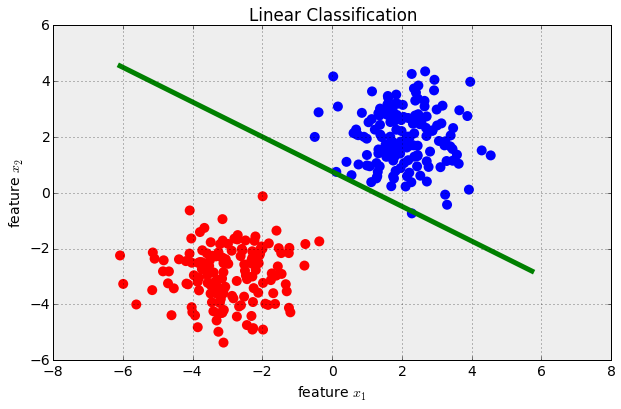

In [33]:
#Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-percep.theta[2]-percep.theta[0]*minx)/percep.theta[1]
y2=(-percep.theta[2]-percep.theta[0]*maxx)/percep.theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-temp.svg',format='svg')



(10000L, 3L)
[1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 

(-5.3678375947281065, 4.3540144301612509)

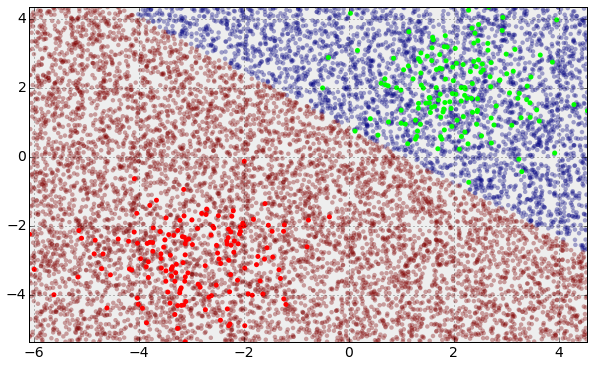

In [34]:
# A different visualization...
npts=10000
model=percep
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

tx=np.hstack((tx,np.ones((tx.shape[0],1))))

print tx.shape
cs= model.predict(tx)
print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

###Debugging Tip
You can import pdb and call its function set_trace (i.e pdb.set_trace()) any where in your code to stop the execution of your 

In [46]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [47]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [48]:
print X.shape[1]

4


In [49]:
# Lets work only on binary data...
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [50]:
# Labels must be -1 and +1
Y[Y=='Iris-versicolor']=-1
Y[Y=='Iris-setosa']=+1

#Lets append a vector of dummy 1's at the end of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [51]:
percep=Perceptron()
feat=[0,1,4]

In [52]:
percep.train(X[:,feat],Y) # your cost function at the minimum must be small

Converged, iterations:  523 !!!
Value of Cost Function (obtained in 524 iterations) at Minimum Points [[-0.1868518 ]
 [ 0.11535846]
 [ 0.62709631]], is -0.170393817009


(1000L, 3L)


(2.0, 4.4000000000000004)

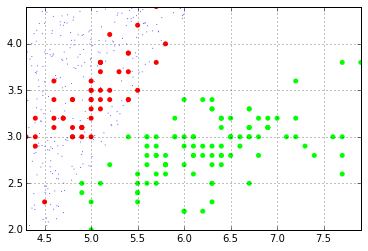

In [53]:
#%pdb
npts=1000
model=percep
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

tx=np.hstack((tx,np.ones((tx.shape[0],1))))

print tx.shape
cs= model.predict(tx)
cs=np.asarray(cs)
#print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],cs.ravel(),alpha=.75)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

4.3 7.9 [ 1.52885543] [ 7.35995307]


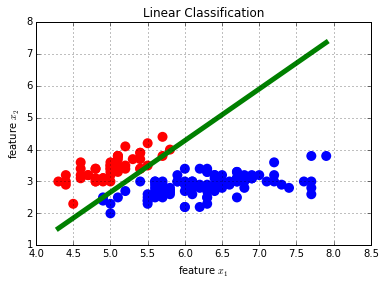

In [54]:
#Lets plot the decision boundary...
plt.scatter(X[Y.ravel()==1,0],X[Y.ravel()==1,1], c='r', s=100)
plt.scatter(X[Y.ravel()==-1,0],X[Y.ravel()==-1,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-percep.theta[2]-percep.theta[0]*minx)/percep.theta[1]
y2=(-percep.theta[2]-percep.theta[0]*maxx)/percep.theta[1]
print minx,maxx, y1, y2
plt.plot([minx,maxx],[y1,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm-class.svg',format='svg')

### Lets train and test on Iris dataset

In [58]:
def print_confusion_matrix(plabels,tlabels):
    import pandas as pd
    plabels = pd.Series(plabels)
    tlabels = pd.Series(tlabels)
    
    # draw a cross tabulation...
    df_confusion = pd.crosstab(tlabels,plabels, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    #print df_confusion
    return df_confusion

In [59]:
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)
Ytrain=Ytrain.reshape(len(Ytrain),1)
Ytest=Ytest.reshape(len(Ytest),1)
print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape   


 Training Data Set Dimensions= (104L, 5L) Training True Class labels dimensions (104L, 1L)
 Test Data Set Dimensions= (45L, 5L) Test True Class labels dimensions (45L, 1L)


In [60]:
percep.train(Xtrain,Ytrain) # your cost function at the minimum must be zero...

Converged, iterations:  91 !!!
Value of Cost Function (obtained in 92 iterations) at Minimum Points [[-0.15658823]
 [ 0.21424159]
 [-0.20853522]
 [ 0.42493183]
 [ 0.39084334]], is -0.236087139301


In [61]:
#Lets test it on the set of unseen examples...
pclasses=percep.predict(Xtest)

#### Check Accuracy and Print Confusion Matrix

In [62]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==np.concatenate(Ytest))
print "Accuracy = ", np.sum(pclasses==np.concatenate(Ytest))/float(Ytest.shape[0])

# Print the 
print_confusion_matrix(np.asarray(pclasses).ravel(),Ytest.ravel())

44
Accuracy =  0.977777777778


Predicted,-1,1,All
Actual,,,
-1,29,1,30
1,0,15,15
All,29,16,45
